In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def gis_prediction():
    return model_size / bandwidth_dict["s2c"] + model_size / bandwidth_dict["s2c"] * (1-recv_ratio) * (nr_worker-1)
def emp_prediction():
    time_fixed_model = (2 * model_size) / bandwidth_dict["c2c"]
    return (nr_worker - 1) * (1 + recv_ratio) * time_fixed_model + mul_time_per_million * (param_size/1000000)
def agg_prediction():
    return 2 * nr_layer * ((nr_worker - 1) * (nr_worker * time_cmd)) + (nr_worker - 1) * nr_worker *  (param_size/1000000) * add_p
def dec_prediction():
    return nr_worker * (model_size * 2 / bandwidth_dict["c2w"])

In [69]:
# # resnet 18 (1000mbps)
# param_size = 11689512
# model_size = param_size * 32
# add_p = 0.0014
# add_time_per_million = 0.012
# mul_time_per_million = 0

# nr_layer = 62
# nr_worker = 3
# recv_ratio = 91.55/100

# bandwidth_dict = {}
# bandwidth_dict["s2c"] = 47.2 * 1000 * 1000
# bandwidth_dict["c2c"] = 48.97 * 1000 * 1000
# bandwidth_dict["c2w"] = 465 * 1000 * 1000

# time_cmd = 0.002

In [70]:
# # resnet 18 (500mbps)
# param_size = 11689512
# model_size = param_size * 32
# add_p = 0.0014
# add_time_per_million = 0.012
# mul_time_per_million = 0

# nr_layer = 62
# nr_worker = 3
# recv_ratio = 88/100

# bandwidth_dict = {}
# bandwidth_dict["s2c"] = 43.85 * 1000 * 1000
# bandwidth_dict["c2c"] = 46.42 * 1000 * 1000
# bandwidth_dict["c2w"] = 313.92 * 1000 * 1000

# time_cmd = 0.002

In [62]:
# # resnet 18 (100mbps)
# param_size = 11689512
# model_size = param_size * 32
# add_p = 0.0014
# add_time_per_million = 0.012
# mul_time_per_million = 0

# nr_layer = 62
# nr_worker = 3
# recv_ratio = 63.38/100

# bandwidth_dict = {}
# bandwidth_dict["s2c"] = 33.28 * 1000 * 1000
# bandwidth_dict["c2c"] = 34.1 * 1000 * 1000
# bandwidth_dict["c2w"] = 86.41 * 1000 * 1000

# time_cmd = 0.002

In [71]:
# resnet 18 (10mbps)
param_size = 11689512
model_size = param_size * 32
add_p = 0.0014
add_time_per_million = 0.012
mul_time_per_million = 0

nr_layer = 62
nr_worker = 3
recv_ratio = (100-85)/100

bandwidth_dict = {}
bandwidth_dict["s2c"] = 8.07 * 1000 * 1000
bandwidth_dict["c2c"] = 8.1 * 1000 * 1000
bandwidth_dict["c2w"] = 9.46 * 1000 * 1000

time_cmd = 0.002

In [72]:
gis_prediction()

125.1516526394052

In [73]:
emp_prediction()

212.43162548148146

In [74]:
agg_prediction()

1.5861919008

In [75]:
dec_prediction()

237.2501378435518

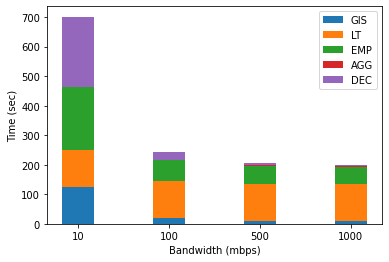

In [76]:
N = 4
width = 0.35
x = ("10", '100', '500', '1000')

gis = (125.15, 19.472, 10.578, 9.264)
lt = tuple([124.91] * N)
emp = (212.43, 71.689, 60.598, 58.5273)
b_emp = list(np.add(gis, lt))
agg = (1.5862, 1.5862, 1.5862, 1.5862)
b_agg = list(np.add(b_emp, emp))
dec = (237.25, 25.9737, 7.14955, 4.8266)
b_dec = list(np.add(b_agg, agg))

plt.bar(x, gis, width)
plt.bar(x, lt, width, bottom=gis)
plt.bar(x, emp, width, bottom=b_emp)
plt.bar(x, agg, width, bottom=b_agg)
plt.bar(x, dec, width, bottom=b_dec)

plt.ylabel('Time (sec)')
plt.xlabel('Bandwidth (mbps)')
plt.title('')
plt.legend(labels=['GIS', 'LT', "EMP", "AGG", "DEC"])
plt.show()